# Causal structure discovery on particle system with and without springs

This notebook contains reports on causal discovery for particle system with periodic springs. We can compare the behaviour of these two systems through time series. Observational data were collected from particle system with two particles with a trajectory length of 100000 at a sample frequency 500. The springs were removed and attached periodically. In the next section we will load all necessary python packages and load observational data.

<b> This observational data was sampled from a particle system with 4 particles where particle_0 and particle_1 had a spring between them and the rest did not.</b> Each trajectory was of lenght 100000 and 10 such simulations were generated. For every 50000 steps springs were attached and detached periodically.

In [21]:
import numpy as np
import pandas as pd
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.independence_tests import ParCorr
from tigramite.pcmci import PCMCI
import networkx as nx

In [22]:
# Variables of interest
variables_dim_1 = ['p_0_x_position', 'p_1_x_position', 'p_2_x_position', 'p_3_x_position']
variables_dim_2 = ['p_0_y_position', 'p_1_y_position', 'p_2_x_position', 'p_3_x_position']

def load_observations(path, _variables):
    data = pd.read_csv(path)
    # reversing the data so that the least valued
    # 0 index represents most reset observation
    # collect variables of interest
    if _variables:
        data = data[_variables]
    print(data.head())
    var_names = data.columns.values
    dataframe = pp.DataFrame(data.values,
                             datatime=np.arange(len(data)),
                             var_names=var_names)
    return dataframe

## Loading observational data and collecting variables of interest

In [23]:
observations_dim_1 = load_observations('../data/observations.csv', variables_dim_1)
observations_dim_2 = load_observations('../data/observations.csv', variables_dim_2)
springs = load_observations('../data/springs.csv', [])

   p_0_x_position  p_1_x_position  p_2_x_position  p_3_x_position
0       -0.049469       -0.230579        0.213558       -0.831932
1       -0.041427       -0.238539        0.213456       -0.831709
2       -0.034011       -0.245875        0.213354       -0.831486
3       -0.027266       -0.252538        0.213252       -0.831262
4       -0.021236       -0.258487        0.213150       -0.831039
   p_0_y_position  p_1_y_position  p_2_x_position  p_3_x_position
0       -0.321497        0.019180        0.213558       -0.831932
1       -0.334919        0.032935        0.213456       -0.831709
2       -0.347175        0.045524        0.213354       -0.831486
3       -0.358186        0.056867        0.213252       -0.831262
4       -0.367880        0.066894        0.213150       -0.831039
  trajectory_step  s_0_0     s_0_1  s_0_2  s_0_3     s_1_0  s_1_1  s_1_2  \
0         57_1999    0.0  1.715846    0.0    0.0  1.715846    0.0    0.0   
1         57_1998    0.0  1.715846    0.0    0.0  1.7158

## Time series plots for these observations

(<Figure size 432x288 with 4 Axes>,
 array([<AxesSubplot:ylabel='p_0_x_position'>,
        <AxesSubplot:ylabel='p_1_x_position'>,
        <AxesSubplot:ylabel='p_2_x_position'>,
        <AxesSubplot:xlabel='time', ylabel='p_3_x_position'>], dtype=object))

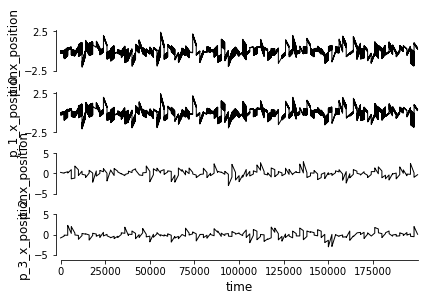

In [24]:
tp.plot_timeseries(observations_dim_1)

(<Figure size 432x288 with 4 Axes>,
 array([<AxesSubplot:ylabel='p_0_y_position'>,
        <AxesSubplot:ylabel='p_1_y_position'>,
        <AxesSubplot:ylabel='p_2_x_position'>,
        <AxesSubplot:xlabel='time', ylabel='p_3_x_position'>], dtype=object))

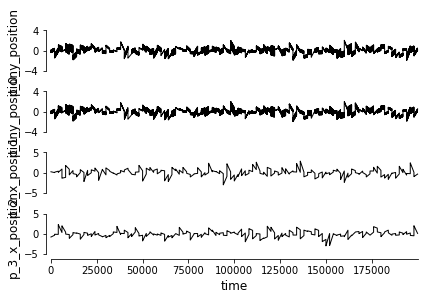

In [25]:
tp.plot_timeseries(observations_dim_2)

The particle system with springs tend to have periodic oscillations and thus creates a dense time series plots. These oscillations or periodic patterns have encoded necessary information to retrieve causal graphs.

## Setting up PC Algorithm for these observations.

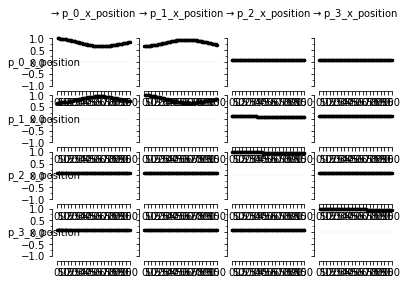

In [26]:
def setup_pcmci(data_frame):
    pcmci = PCMCI(dataframe=data_frame,
                  cond_ind_test=ParCorr(),
                  verbosity=0)
    correlations = pcmci.get_lagged_dependencies(tau_max=100, val_only=True)['val_matrix']
    var_names = ['p_0_x_position', 'p_1_x_position', 'p_2_x_position', 'p_3_x_position']
    lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, 
                                       setup_args={'var_names':var_names, 
                                                   'x_base':5, 'y_base':.5});
    return pcmci

pcmci = setup_pcmci(observations_dim_1)

The lagged dependencies or auto correlation plots clearly delineate that particle system with springs have dependencies over its own trajectories. 

## Picking parents.

Unlike the previous report, here instead of picking all nodes as possible parents we will manually select the nodes for reduce computational complexity. In the perivious report we have considers only one dimension for results ie x dimensions of particles but in this report we will consider both x and y dimension.



## Running PCMCI on observational dimension 1
The results from PCMCI suggests that there are many causal links for some particles from the given observations.

In [27]:
def get_parents(tau_max, tau_min):
    _vars = list(range(len(variables_dim_1)))
    _lags = list(range(-(tau_max), -tau_min + 1, 1))
    # Set the default as all combinations of the selected variables
    _int_sel_links = {}
    for j in _vars:
        _int_sel_links[j] = [(var, -lag) for var in _vars
                             for lag in range(tau_min, tau_max + 1)
                             if not (var == j and lag == 0)]
    # Remove contemporary links
    for j in _int_sel_links.keys():
        _int_sel_links[j] = [link for link in _int_sel_links[j]
                             if link[1] != 0]
    # Remove self links
    for j in _int_sel_links.keys():
        _int_sel_links[j] = [link for link in _int_sel_links[j]
                             if link[0] != j]

    return _int_sel_links


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
selected_links = {0: [(1, -1), (1, -2), (1, -3), (1, -4), (1, -5), (1, -6), (1, -7), (1, -8), (1, -9), (1, -10), (1, -11), (1, -12), (1, -13), (1, -14), (1, -15), (1, -16), (1, -17), (1, -18), (1, -19), (1, -20), (1, -21), (1, -22), (1, -23), (1, -24), (1, -25), (1, -26), (1, -27), (1, -28), (1, -29), (1, -30), (1, -31), (1, -32), (1, -33), (1, -34), (1, -35), (1, -36), (1, -37), (1, -38), (1, -39), (1, -40), (1, -41), (1, -42), (1, -43), (1, -44), (1, -45), (1, -46), (1, -47), (1, -48), (1, -49), (1, -50), (1, -51), (1, -52), (1, -53), (1, -54), (1, -55), (1, -56), (1, -57), (1, -58), (1, -59), (1, -60), (1, -61), (1, -62), (1, -63), (1, -64), (1, -65), (1, -66), (1, -67), (1, -68), (1, -69), (1, -70), (1, -71), (1, -72), (1, -73), (1, -74), (1, -75), (1, -76), (1, -77), (1, -78), (1, -79), (1, -80), (1, -81), (1, -82), (1, -83), (1, -84), (1, -85), (1, -86), (1, -87), (1, -88), (1, -89), (1, -90), (1, -91), (1, -92),


## Resulting lagged parent (super)sets:

    Variable p_0_x_position has 25 link(s):
        (p_1_x_position -47): max_pval = 0.00000, min_val =  0.032
        (p_1_x_position -1): max_pval = 0.00000, min_val =  0.024
        (p_1_x_position -42): max_pval = 0.00000, min_val =  0.019
        (p_1_x_position -65): max_pval = 0.00000, min_val =  0.018
        (p_2_x_position -1): max_pval = 0.00000, min_val =  0.015
        (p_1_x_position -2): max_pval = 0.00000, min_val =  0.011
        (p_1_x_position -75): max_pval = 0.00008, min_val =  0.009
        (p_1_x_position -9): max_pval = 0.00008, min_val = -0.009
        (p_1_x_position -7): max_pval = 0.00021, min_val = -0.008
        (p_1_x_position -4): max_pval = 0.00034, min_val = -0.008
        (p_1_x_position -18): max_pval = 0.00214, min_val = -0.007
        (p_1_x_position -15): max_pval = 0.00231, min_val = -0.007
        (p_1_x_position -23): max_pval = 0.00461, min_val = -0.006
        (p_1_x_position -5): max_pval = 0.00667, 

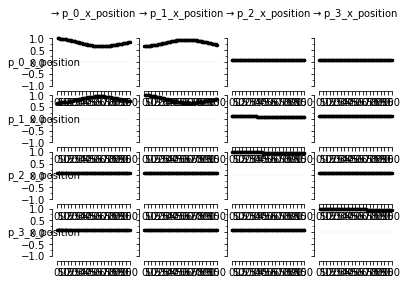

In [28]:
# *** Control Variables ***
tau_max = 100

parents = get_parents(tau_min=1, tau_max=tau_max)
pcmci = setup_pcmci(observations_dim_1)
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=tau_max,
                          selected_links=parents)
p_values_dim_1 = results['p_matrix'].round(3)

Running pcmci on dim 2

##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
selected_links = {0: [(1, -1), (1, -2), (1, -3), (1, -4), (1, -5), (1, -6), (1, -7), (1, -8), (1, -9), (1, -10), (1, -11), (1, -12), (1, -13), (1, -14), (1, -15), (1, -16), (1, -17), (1, -18), (1, -19), (1, -20), (1, -21), (1, -22), (1, -23), (1, -24), (1, -25), (1, -26), (1, -27), (1, -28), (1, -29), (1, -30), (1, -31), (1, -32), (1, -33), (1, -34), (1, -35), (1, -36), (1, -37), (1, -38), (1, -39), (1, -40), (1, -41), (1, -42), (1, -43), (1, -44), (1, -45), (1, -46), (1, -47), (1, -48), (1, -49), (1, -50), (1, -51), (1, -52), (1, -53), (1, -54), (1, -55), (1, -56), (1, -57), (1, -58), (1, -59), (1, -60), (1, -61), (1, -62), (1, -63), (1, -64), (1, -65), (1, -66), (1, -67), (1, -68), (1, -69), (1, -70), (1, -71), (1, -72), (1, -73), (1, -74), (1, -75), (1, -76), (1, -77), (1, -78), (1, -79), (1, -80), (1, -81), (1, -82), (1, -83), (1, -84), (1, -85), (1, -86), (1, -87), (1, -88), (1, -89), (1, -9


## Resulting lagged parent (super)sets:

    Variable p_0_y_position has 23 link(s):
        (p_1_y_position -59): max_pval = 0.00000, min_val =  0.031
        (p_1_y_position -2): max_pval = 0.00000, min_val = -0.019
        (p_1_y_position -78): max_pval = 0.00000, min_val =  0.016
        (p_1_y_position -100): max_pval = 0.00000, min_val = -0.012
        (p_1_y_position -44): max_pval = 0.00000, min_val =  0.011
        (p_1_y_position -51): max_pval = 0.00001, min_val =  0.010
        (p_1_y_position -33): max_pval = 0.00007, min_val = -0.009
        (p_1_y_position -7): max_pval = 0.00044, min_val = -0.008
        (p_1_y_position -12): max_pval = 0.00059, min_val = -0.008
        (p_1_y_position -23): max_pval = 0.00217, min_val = -0.007
        (p_1_y_position -9): max_pval = 0.00228, min_val = -0.007
        (p_1_y_position -39): max_pval = 0.00232, min_val = -0.007
        (p_1_y_position -56): max_pval = 0.00272, min_val =  0.007
        (p_1_y_position -3): max_pval = 0.002

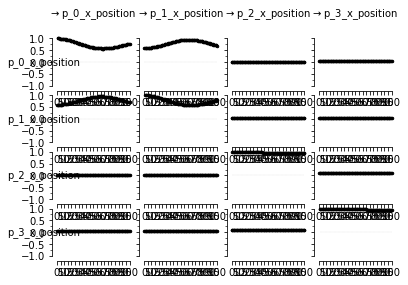

In [ ]:
print('Running pcmci on dim 2')
pcmci = setup_pcmci(observations_dim_2)
pcmci.verbosity = 1

results = pcmci.run_pcmci(tau_max=tau_max,
                            selected_links=parents)
p_values_dim_2 = results['p_matrix'].round(3)

The result matrix have a dimension of particle_id x particle_id x tau. A P value greater than 0.05 indicates a stronger confidence in rejecting the null hypothesis. The null hypothesis being <b> There does not exist a causal link between two particles </b> 

## Constructing causal graphs from the p value results obtained by PCMCI

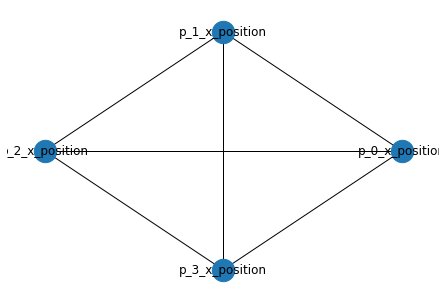

In [30]:
nodes = ['p_0_x_position', 'p_1_x_position', 'p_2_x_position', 'p_3_x_position']
complete_graph = nx.complete_graph(nodes)
nx.draw(complete_graph,
        pos=nx.circular_layout(complete_graph),
        with_labels=True,
        node_size=500)

## Inspecting causal graph for a chosen time step within tau

In [33]:
time_step = 13
p_values = p_values_dim_2[0][1]
p_values[:10]

array([1.   , 0.   , 0.834, 0.544, 0.358, 0.005, 0.101, 0.   , 0.037,
       0.   ])

In [36]:
p_value_matrix = p_values_dim_2[2][3]
p_value_matrix

array([1.   , 0.   , 0.592, 0.449, 0.355, 0.286, 0.233, 0.192, 0.16 ,
       0.133, 0.112, 0.094, 0.08 , 0.068, 0.058, 0.049, 0.042, 0.036,
       0.031, 0.027, 0.023, 0.02 , 0.017, 0.015, 0.013, 0.011, 0.01 ,
       0.008, 0.007, 0.006, 0.006, 0.005, 0.004, 0.004, 0.003, 0.003,
       0.003, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ])

The results above show the p value for particle_0 and particle_1 for last 10 time steps for a given observational data. The p value suggests that we can reject the null hypothesis and thus there exist springs between particle_1 and particle_0 and we cannot reject null hypothesis for other particle combinations.

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

max_precision = 0.0 

def construct_causal_graph(time_step, p_values_dim_1, p_values_dim_2):
    _vars = [f'particle_{i}' for i in range(len(variables_dim_1))]
    graph = nx.complete_graph(_vars)
    for p_a in range(len(_vars)):
        for p_b in range(len(_vars)):
            avg_p_val = (p_values_dim_1[p_a][p_b][time_step] + p_values_dim_2[p_a][p_b][time_step])/2.0
            if graph.has_edge(f'particle_{p_a}', f'particle_{p_b}') and (np.abs(avg_p_val) > 0.25):
                graph.remove_edge(f'particle_{p_a}', f'particle_{p_b}')
    save_graph(time_step, graph, variables_dim_1)

def save_graph(time_step, causal_graph, _variables):
    # observations -> positions
    # springs -> spring constants
    # causal graph from predictions

    fig, axes = plt.subplots(2, 2, figsize=(24, 16))
    fig.suptitle(f'Time step {time_step}')

    # ----- Plotting Particle positions
    axes[0][0].set_title('Particle position')
    entries = []
    _observations = pd.read_csv('../data/observations.csv')
    for particle_id in range(0, len(variables_dim_1)):
        data = {'particle': particle_id,
                'x_cordinate': _observations.iloc[time_step][f'p_{particle_id}_x_position'],
                'y_cordinate': _observations.iloc[time_step][f'p_{particle_id}_y_position']}
        entries.append(data)
    pdframe = pd.DataFrame(entries)
    pl = sns.scatterplot(data=pdframe,
                         x='x_cordinate',
                         y='y_cordinate',
                         hue='particle',
                         ax=axes[0][0])
    pl.set_ylim(-5.0, 5.0)
    pl.set_xlim(-5.0, 5.0)

    # ----- Plotting spring constants
    _springs = pd.read_csv('../data/springs.csv')
    axes[0][1].set_title(f'Spring connections')
    columns = [f'particle_{i}' for i in range(len(_variables))]
    s_mat = []
    for p_a in range(len(_variables)):
        for p_b in range(len(_variables)):
            s_mat.append(_springs.iloc[time_step][f's_{p_a}_{p_b}'])
    s_mat = np.reshape(s_mat, (len(_variables), len(_variables)))
    sns.heatmap(pd.DataFrame(s_mat, columns=columns, index=columns),
                vmin=0.0, vmax=2.0, ax=axes[0][1])

    # ----- Plotting Ground Truth Causal graph
    axes[1][0].set_title(f'Ground truth causal graph (Springs)')
    _vars = [f'particle_{i}' for i in range(len(_variables))]
    graph = nx.complete_graph(_vars)
    for p_a in range(len(_vars)):
        for p_b in range(len(_vars)):
            if np.abs(_springs.iloc[time_step][f's_{p_a}_{p_b}']) == 0.0 and graph.has_edge(f'particle_{p_a}', f'particle_{p_b}'):
                graph.remove_edge(f'particle_{p_a}', f'particle_{p_b}')
    nx.draw(graph,
            pos=nx.circular_layout(graph),
            with_labels=True,
            ax=axes[1][0],
            node_size=500)

    # ----- Plotting Predicted Causal graph
    axes[1][1].set_title(f'Predicted causal graph (Springs)')
    nx.draw(causal_graph,
            pos=nx.circular_layout(causal_graph),
            with_labels=True,
            ax=axes[1][1],
            node_size=500)

    confusion_matrix = np.zeros(shape=(2, 2))
    for p_a in range(len(_vars)):
        for p_b in range(len(_vars)):
            if np.abs(_springs.iloc[time_step][f's_{p_a}_{p_b}']) == 0.0 and graph.has_edge(f'particle_{p_a}', f'particle_{p_b}'):
                # false positive
                confusion_matrix[0][1] += 1
            if np.abs(_springs.iloc[time_step][f's_{p_a}_{p_b}']) == 0.0 and not graph.has_edge(f'particle_{p_a}', f'particle_{p_b}'):
                # True negative
                confusion_matrix[1][1] += 1

            if np.abs(_springs.iloc[time_step][f's_{p_a}_{p_b}']) > 0.0 and graph.has_edge(f'particle_{p_a}', f'particle_{p_b}'):
                # True positive
                confusion_matrix[0][0] += 1

            if np.abs(_springs.iloc[time_step][f's_{p_a}_{p_b}']) > 0.0 and not graph.has_edge(f'particle_{p_a}', f'particle_{p_b}'):
                # False negative
                confusion_matrix[1][0] += 1
    print(confusion_matrix)
    precision = 0
    try:
        precision = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1])
        max_precision = max(max_precision, precision)
    except Exception as e:
        pass
    try:
        recall = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0])
    except Exception as e:
        pass
    
    print(max_precision)
    
    plt.text(2, 2, f'Precision : {precision}, Recall : {recall}', bbox=dict(facecolor='red', alpha=0.5))

    # plt.show()
    fig.savefig(os.path.join('../tmp', f'graph_{time_step}.png'))
    plt.clf()
    plt.close(fig)                
                
time_step = tau_max-1
while time_step != 0:
    construct_causal_graph(time_step, p_values_dim_1, p_values_dim_2)
    time_step -= 1

# Conclusion

In the above notebook experiment we collected observational data from particle systems with and with causal links (springs) we studied their behaviour with time series plots and auto correlation. We ran PC Algorithm extened to time series (i.e PCMCI) using the python package tigramite. We inferred the results and constructed a causal graph from based on observational data alone. We can compare the results from original system and the predicted graph.